In [1]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.8/288.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 6.0 MB/s eta 0:

## Nut Recognizer

In [2]:
from fastai.vision.all import *

In [3]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd /content/drive/My Drive/Nut Recognizer

/content/drive/My Drive/Nut Recognizer


In [6]:
#!export
model = load_learner('models/nut-recognizer-v14.pkl')

In [7]:

#!export
nut_labels = [
    'raw Almonds',
    'raw Brazil nut',
    'raw Cashew nut',
    'raw Chestnut',
    'raw Ginkgo nut',
    'raw Hazelnuts',
    'raw Hickory nut',
    'raw Maccademia nut',
    'raw Peanut',
    'raw Pecans',
    'raw Pili nut',
    'raw Pine nut',
    'raw Pistachios nut',
    'raw Walnuts'
    ]



In [9]:
def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(nut_labels, map(float, probs)))



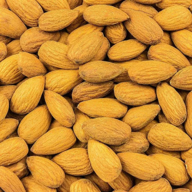

In [10]:
img = PILImage.create(f'Almonds-3.jpg')
img.thumbnail((192,192))
img

In [11]:
recognize_image(img)

{'raw Almonds': 0.999998927116394,
 'raw Brazil nut': 2.136614618564181e-08,
 'raw Cashew nut': 5.630598209904747e-10,
 'raw Chestnut': 2.575919477720845e-10,
 'raw Ginkgo nut': 5.071150326330098e-07,
 'raw Hazelnuts': 1.4031374950818076e-09,
 'raw Hickory nut': 8.950574681421131e-08,
 'raw Maccademia nut': 3.9650998040485774e-09,
 'raw Peanut': 2.1497538682524464e-07,
 'raw Pecans': 1.014797490483943e-08,
 'raw Pili nut': 4.28884971981347e-09,
 'raw Pine nut': 2.5251717383767414e-10,
 'raw Pistachios nut': 2.3244247415732389e-07,
 'raw Walnuts': 1.4642378864948569e-08}

In [12]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=3)
examples = [
    'almonds.jpg',
    'macadamia.jpeg',
    'cashew.jpeg',
    'peanuts.jpg',
    'chestnuts.jpg'

    ]

iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
iface.launch(inline=False, share = True)

<ipython-input-12-be781dac1d6d>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(224,224))
<ipython-input-12-be781dac1d6d>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(224,224))
<ipython-input-12-be781dac1d6d>:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=3)
<ipython-input-12-be781dac1d6d>:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=3)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4d11d8281b1aee40aa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# https://huggingface.co/spaces/nasrin2023ripa/nut-recognizer

https://4d11d8281b1aee40aa.gradio.live/